# Create label for training in future

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
meta = pd.read_csv('../meta_info.csv')

In [3]:
meta.head()

,patient_id,nodule_no,slice_no,original_image,mask_image,malignancy,is_cancer,is_clean
0,1,0,0,LIDC-IDRI-0001/0001_NI000_slice000,LIDC-IDRI-0001/0001_MA000_slice000,5,True,False
1,1,0,1,LIDC-IDRI-0001/0001_NI000_slice001,LIDC-IDRI-0001/0001_MA000_slice001,5,True,False
2,1,0,2,LIDC-IDRI-0001/0001_NI000_slice002,LIDC-IDRI-0001/0001_MA000_slice002,5,True,False
3,1,0,3,LIDC-IDRI-0001/0001_NI000_slice003,LIDC-IDRI-0001/0001_MA000_slice003,5,True,False
4,1,0,4,LIDC-IDRI-0001/0001_NI000_slice004,LIDC-IDRI-0001/0001_MA000_slice004,5,True,False


In [4]:
# NI= Nodule Image, MA = Mask Original , CN = Clean Nodule , CM = Clean Mask

In [5]:
def is_nodule(row):
    if row[20:22] =='NI':
        return True
    else:
        return False

In [6]:
meta['is_nodule']= meta['original_image'].apply(lambda row: is_nodule(row))

In [7]:
# Lets separate Clean meta and meta data
clean_meta = meta[meta['is_nodule']==False]
clean_meta.reset_index(inplace=True)
meta = meta[meta['is_nodule']==True]
meta.reset_index(inplace=True)

In [8]:
clean_meta.head(2)

,index,patient_id,nodule_no,slice_no,original_image,mask_image,malignancy,is_cancer,is_clean,is_nodule
0,298,28,0,0,LIDC-IDRI-0028/0028_CN001_slice000,LIDC-IDRI-0028/0028_CM001_slice000,0,False,True,False
1,299,28,1,1,LIDC-IDRI-0028/0028_CN001_slice001,LIDC-IDRI-0028/0028_CM001_slice001,0,False,True,False


In [9]:
meta.head(2)

,index,patient_id,nodule_no,slice_no,original_image,mask_image,malignancy,is_cancer,is_clean,is_nodule
0,0,1,0,0,LIDC-IDRI-0001/0001_NI000_slice000,LIDC-IDRI-0001/0001_MA000_slice000,5,True,False,True
1,1,1,0,1,LIDC-IDRI-0001/0001_NI000_slice001,LIDC-IDRI-0001/0001_MA000_slice001,5,True,False,True


In [10]:
def is_train(row,train,val,test):
    if row in train:
        return 'Train'
    elif row in val:
        return 'Validation'
    else:
        return 'Test'

In [11]:

clean_patient_id = list(np.unique(clean_meta['patient_id']))
meta_patient_id = list(np.unique(meta['patient_id']))

In [13]:
def create_label_segmentation(meta):
    patient_id = list(np.unique(meta['patient_id']))
    train_patient , test_patient = train_test_split(patient_id,test_size= 0.2)
    train_patient, val_patient = train_test_split(train_patient,test_size= 0.25)
    print(len(train_patient),len(val_patient),len(test_patient))
    
    meta['data_split']= meta['patient_id'].apply(lambda row : is_train(row,train_patient,val_patient,test_patient))
    
    return meta

In [14]:
# We need to train/test split independently for clean_meta, meta
meta = create_label_segmentation(meta)
clean_meta = create_label_segmentation(clean_meta)

504 168 168
81 27 27


In [15]:
meta.head()

,index,patient_id,nodule_no,slice_no,original_image,mask_image,malignancy,is_cancer,is_clean,is_nodule,data_split
0,0,1,0,0,LIDC-IDRI-0001/0001_NI000_slice000,LIDC-IDRI-0001/0001_MA000_slice000,5,True,False,True,Train
1,1,1,0,1,LIDC-IDRI-0001/0001_NI000_slice001,LIDC-IDRI-0001/0001_MA000_slice001,5,True,False,True,Train
2,2,1,0,2,LIDC-IDRI-0001/0001_NI000_slice002,LIDC-IDRI-0001/0001_MA000_slice002,5,True,False,True,Train
3,3,1,0,3,LIDC-IDRI-0001/0001_NI000_slice003,LIDC-IDRI-0001/0001_MA000_slice003,5,True,False,True,Train
4,4,1,0,4,LIDC-IDRI-0001/0001_NI000_slice004,LIDC-IDRI-0001/0001_MA000_slice004,5,True,False,True,Train


In [16]:
clean_meta.head()

,index,patient_id,nodule_no,slice_no,original_image,mask_image,malignancy,is_cancer,is_clean,is_nodule,data_split
0,298,28,0,0,LIDC-IDRI-0028/0028_CN001_slice000,LIDC-IDRI-0028/0028_CM001_slice000,0,False,True,False,Test
1,299,28,1,1,LIDC-IDRI-0028/0028_CN001_slice001,LIDC-IDRI-0028/0028_CM001_slice001,0,False,True,False,Test
2,300,28,2,2,LIDC-IDRI-0028/0028_CN001_slice002,LIDC-IDRI-0028/0028_CM001_slice002,0,False,True,False,Test
3,301,28,3,3,LIDC-IDRI-0028/0028_CN001_slice003,LIDC-IDRI-0028/0028_CM001_slice003,0,False,True,False,Test
4,302,28,4,4,LIDC-IDRI-0028/0028_CN001_slice004,LIDC-IDRI-0028/0028_CM001_slice004,0,False,True,False,Test


In [17]:
# Clean Meta only stores meta information of patients without nodules.

In [17]:
meta.to_csv('C:/Users/farah/Desktop/Temp/Lung Cancer Project/meta.csv')
clean_meta.to_csv('C:/Users/farah/Desktop/Temp/Lung Cancer Project/clean_meta.csv')

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


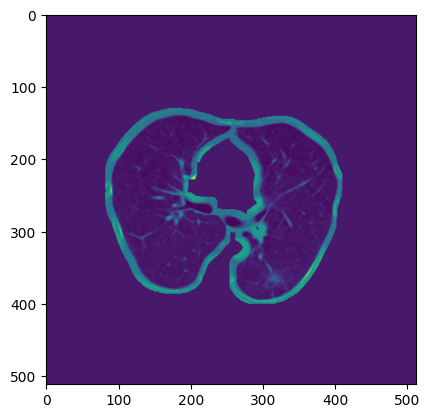

In [18]:
%pip install matplotlib
import matplotlib.pyplot as plt
data = np.load('C:/Users/farah/Desktop/Temp/Lung Cancer Project/LIDC-IDRI-Preprocessing/data/Image/LIDC-IDRI-0001/0001_NI000_slice000.npy')
plt.imshow(data)

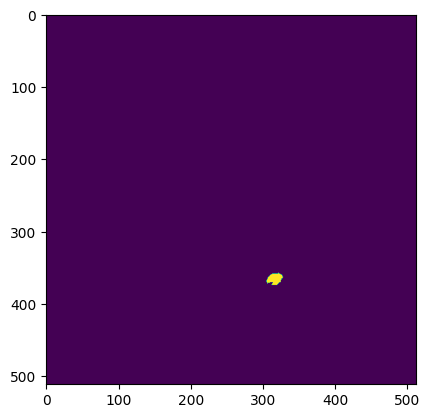

In [19]:
data = np.load('C:/Users/farah/Desktop/Temp/Lung Cancer Project/LIDC-IDRI-Preprocessing/data/Mask/LIDC-IDRI-0001/0001_MA000_slice000.npy')
plt.imshow(data)


In [27]:
import pandas as pd

# Replace 'file1.csv' and 'file2.csv' with the actual names of your CSV files
file1_path = 'C:/Users/farah/Desktop/transformed_meta.csv'
file2_path = 'C:/Users/farah/Desktop/transformed_clean_meta.csv'

# Read data from the first CSV file
data1 = pd.read_csv(file1_path)

# Read data from the second CSV file
data2 = pd.read_csv(file2_path)

# Concatenate the rows from both dataframes
merged_data = pd.concat([data1, data2], ignore_index=True)

# Reset the index
merged_data.reset_index(drop=True, inplace=True)

# Drop the 'data_split' column
if 'data_split' in merged_data.columns:
    merged_data.drop('data_split', axis=1, inplace=True)

# Update the 'is_cancer' column based on the condition of 'is_clean'
merged_data.loc[merged_data['is_clean'] == False, 'is_cancer'] = True

# Update the 'id' column based on the new index
merged_data['id'] = merged_data.index + 1

# Replace 'output_file.csv' with the desired name for the merged CSV file
merged_data.to_csv('C:/Users/farah/Desktop/merged_output_file.csv', index=False)

print("Data merged, 'data_split' column dropped, 'is_cancer' updated, id column renumbered, and saved to 'output_file.csv'")


Data merged, 'data_split' column dropped, 'is_cancer' updated, id column renumbered, and saved to 'output_file.csv'


In [28]:
import pandas as pd

# Load your CSV file
csv_path = 'C:/Users/farah/Desktop/merged_output_file.csv'
df = pd.read_csv(csv_path)

# Extract the part before '/'
df['original_image'] = df['original_image'].str.split('/').str[0]

# Save the modified DataFrame back to the same CSV file (overwrite)
df.to_csv(csv_path, index=False)

# Display the modified DataFrame
print(df.head())


   id  patient_id  nodule_no  original_image  malignancy  is_cancer  is_clean  \
0   1           1          1  LIDC-IDRI-0001           5       True     False   
1   2           2          1  LIDC-IDRI-0002           5       True     False   
2   3           3          4  LIDC-IDRI-0003           2       True     False   
3   4           4          1  LIDC-IDRI-0004           1       True     False   
4   5           5          3  LIDC-IDRI-0005           3       True     False   

   is_nodule  
0       True  
1       True  
2       True  
3       True  
4       True  


In [23]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('C:/Users/farah/Desktop/Temp/Lung Cancer Project/meta.csv')

# Group the DataFrame by 'patient_id' and aggregate the data
aggregated_df = df.groupby('patient_id').agg({
    'nodule_no': 'nunique',
    'original_image': 'first',
    'malignancy': 'first',
    'is_cancer': 'first',
    'is_clean': 'first',
    'is_nodule': 'first',
    'data_split': 'first'
}).reset_index()

# Add a new column 'id' with unique identifiers
aggregated_df['id'] = range(1, len(aggregated_df) + 1)  # Using index as an identifier

# Rearrange the columns to have 'id' at the leftmost position
aggregated_df = aggregated_df[['id'] + [col for col in aggregated_df.columns if col != 'id']]

# Save the result to a new CSV file
aggregated_df.to_csv('C:/Users/farah/Desktop/transformed_meta.csv', index=False)


In [24]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('C:/Users/farah/Desktop/Temp/Lung Cancer Project/clean_meta.csv')

# Group the DataFrame by 'patient_id' and aggregate the data
aggregated_df = df.groupby('patient_id').agg({
    'nodule_no': 'nunique',
    'original_image': 'first',
    'malignancy': 'first',
    'is_cancer': 'first',
    'is_clean': 'first',
    'is_nodule': 'first',
    'data_split': 'first'
}).reset_index()

# Add a new column 'id' with unique identifiers
aggregated_df['id'] = range(1, len(aggregated_df) + 1)  # Using index as an identifier

# Rearrange the columns to have 'id' at the leftmost position
aggregated_df = aggregated_df[['id'] + [col for col in aggregated_df.columns if col != 'id']]
# Save the result to a new CSV file
aggregated_df.to_csv('C:/Users/farah/Desktop/transformed_clean_meta.csv', index=False)


In [29]:
import os
import numpy as np
import csv
from skimage import measure

# Set the path to the folder containing the numpy mask images
root_folder = 'C:/Users/farah/Desktop/Temp/Lung Cancer Project/LIDC-IDRI-Preprocessing/data/Mask'
existing_csv_path = 'C:/Users/farah/Desktop/merged_output_file.csv'

# Read the existing CSV file into a list of dictionaries
existing_data = []
with open(existing_csv_path, 'r') as existing_csv:
    reader = csv.DictReader(existing_csv)
    for row in reader:
        existing_data.append(row)

# Open the existing CSV file for writing (to overwrite the existing content)
with open(existing_csv_path, 'w', newline='') as csvfile:
    # Define the CSV header
    fieldnames = list(existing_data[0].keys()) + ['Number_of_Slices', 'Area', 'Perimeter', 'Eccentricity', 'Solidity',
                                                   'Major_Axis_Length', 'Minor_Axis_Length', 'Compactness']

    # Create the CSV writer
    csvwriter = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header to the CSV file
    csvwriter.writeheader()

    # Iterate over the rows in the existing CSV file
    for existing_row in existing_data:
        foldername = existing_row['original_image']
        folder_path = os.path.join(root_folder, foldername)

        # Check if the folder exists in the mask images
        if os.path.isdir(folder_path):
            print("Processing folder:", foldername)

            # Create an empty 3D array to store the stacked mask images for the current folder
            stacked_masks = None

            # Iterate over the mask images in the subfolder
            for filename in os.listdir(folder_path):
                if not filename.endswith('.npy'):  # Update with the appropriate file extension
                    continue

                image_path = os.path.join(folder_path, filename)

                # Load the mask image directly as a numpy array
                mask_image = np.load(image_path)

                # Convert the binary mask to np.uint8
                binary_mask = (mask_image > 0).astype(np.uint8)

                # Stack the binary mask to create a 3D representation
                if stacked_masks is None:
                    stacked_masks = np.expand_dims(binary_mask, axis=0)
                else:
                    stacked_masks = np.concatenate([stacked_masks, np.expand_dims(binary_mask, axis=0)], axis=0)

            # Now, 'stacked_masks' is a 3D numpy array containing all the stacked mask images for the current folder

            # Print the number of slices in the folder
            num_slices = stacked_masks.shape[0]
            print(f"Number of slices in folder {foldername}: {num_slices}")

            # Perform feature extraction on the stacked 3D image
            features = []

            # Iterate over slices (Z-axis) in the 3D image
            for slice_index in range(num_slices):
                # Extract features using regionprops for each 2D slice
                props = measure.regionprops(stacked_masks[slice_index, :, :])

                # Example features (you can add more):
                area = props[0].area
                perimeter = props[0].perimeter
                eccentricity = props[0].eccentricity
                solidity = props[0].solidity
                major_axis_length = props[0].major_axis_length
                minor_axis_length = props[0].minor_axis_length

                # Calculate Compactness
                compactness = (perimeter ** 2) / area if area > 0 else 0

                # Append the features to the list
                features.append({
                    'Number_of_Slices': num_slices,
                    'Area': area,
                    'Perimeter': perimeter,
                    'Eccentricity': eccentricity,
                    'Solidity': solidity,
                    'Major_Axis_Length': major_axis_length,
                    'Minor_Axis_Length': minor_axis_length,
                    'Compactness': compactness
                })

            # Update the existing row with the new features
            existing_row.update(features[0])  # Assuming features list has only one element

        # Write the updated row to the CSV file
        csvwriter.writerow(existing_row)

        # Optionally, print or use the updated row for further analysis
        print(f"Updated row for folder {foldername}:", existing_row)

# Inform the user that the existing CSV file has been updated
print(f"Features have been added to the existing CSV file at {existing_csv_path}")


Processing folder: LIDC-IDRI-0001
Number of slices in folder LIDC-IDRI-0001: 8
Updated row for folder LIDC-IDRI-0001: {'id': '1', 'patient_id': '1', 'nodule_no': '1', 'original_image': 'LIDC-IDRI-0001', 'malignancy': '5', 'is_cancer': 'True', 'is_clean': 'False', 'is_nodule': 'True', 'Number_of_Slices': 8, 'Area': 262.0, 'Perimeter': 68.73401871576773, 'Eccentricity': 0.7157477572640129, 'Solidity': 0.8851351351351351, 'Major_Axis_Length': 22.31086069242244, 'Minor_Axis_Length': 15.580988047547924, 'Compactness': 18.031928735952324}
Processing folder: LIDC-IDRI-0002
Number of slices in folder LIDC-IDRI-0002: 28
Updated row for folder LIDC-IDRI-0002: {'id': '2', 'patient_id': '2', 'nodule_no': '1', 'original_image': 'LIDC-IDRI-0002', 'malignancy': '5', 'is_cancer': 'True', 'is_clean': 'False', 'is_nodule': 'True', 'Number_of_Slices': 28, 'Area': 68.0, 'Perimeter': 45.21320343559643, 'Eccentricity': 0.9750818583682176, 'Solidity': 0.7157894736842105, 'Major_Axis_Length': 22.1466389434384

In [2]:
import os
import numpy as np
import csv
from skimage import measure

# Set the path to the folder containing the numpy mask images
root_folder = 'C:/Users/farah/Desktop/Temp/Lung Cancer Project/LIDC-IDRI-Preprocessing/data/Clean/Mask'
existing_csv_path = 'C:/Users/farah/Desktop/merged_output_file.csv'

# Read the existing CSV file into a list of dictionaries
existing_data = []
with open(existing_csv_path, 'r') as existing_csv:
    reader = csv.DictReader(existing_csv)
    for row in reader:
        existing_data.append(row)

# Open the existing CSV file for writing (to overwrite the existing content)
with open(existing_csv_path, 'w', newline='') as csvfile:
    # Define the CSV header
    fieldnames = list(existing_data[0].keys()) + ['Number_of_Slices', 'Area', 'Perimeter', 'Eccentricity', 'Solidity',
                                                   'Major_Axis_Length', 'Minor_Axis_Length', 'Compactness']

    # Create the CSV writer
    csvwriter = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header to the CSV file
    csvwriter.writeheader()

    # Iterate over the rows in the existing CSV file
    for existing_row in existing_data:
        foldername = existing_row['original_image']
        folder_path = os.path.join(root_folder, foldername)

        # Check if the folder exists in the mask images
        if os.path.isdir(folder_path):
            print("Processing folder:", foldername)

            # Create an empty 3D array to store the stacked mask images for the current folder
            stacked_masks = None

            # Iterate over the mask images in the subfolder
            for filename in os.listdir(folder_path):
                if not filename.endswith('.npy'):  # Update with the appropriate file extension
                    continue

                image_path = os.path.join(folder_path, filename)

                # Load the mask image directly as a numpy array
                mask_image = np.load(image_path)

                # Convert the binary mask to np.uint8
                binary_mask = (mask_image > 0).astype(np.uint8)

                # Stack the binary mask to create a 3D representation
                if stacked_masks is None:
                    stacked_masks = np.expand_dims(binary_mask, axis=0)
                else:
                    stacked_masks = np.concatenate([stacked_masks, np.expand_dims(binary_mask, axis=0)], axis=0)

            # Now, 'stacked_masks' is a 3D numpy array containing all the stacked mask images for the current folder

            # Print the number of slices in the folder
            num_slices = stacked_masks.shape[0]
            print(f"Number of slices in folder {foldername}: {num_slices}")

            # Perform feature extraction on the stacked 3D image
            features = []

            # Iterate over slices (Z-axis) in the 3D image
            for slice_index in range(num_slices):
                # Extract features using regionprops for each 2D slice
                props = measure.regionprops(stacked_masks[slice_index, :, :])

                # Check if props is not empty before accessing its elements
                if props:
                    # Example features (you can add more):
                    area = props[0].area
                    perimeter = props[0].perimeter
                    eccentricity = props[0].eccentricity
                    solidity = props[0].solidity
                    major_axis_length = props[0].major_axis_length
                    minor_axis_length = props[0].minor_axis_length

                    # Calculate Compactness
                    compactness = (perimeter ** 2) / area if area > 0 else 0

                    # Append the features to the list
                    features.append({
                        'Number_of_Slices': num_slices,
                        'Area': area,
                        'Perimeter': perimeter,
                        'Eccentricity': eccentricity,
                        'Solidity': solidity,
                        'Major_Axis_Length': major_axis_length,
                        'Minor_Axis_Length': minor_axis_length,
                        'Compactness': compactness
                    })
                else:
                    print(f"No connected components found in slice {slice_index} for folder {foldername}")

            # Update the existing row with the new features
            existing_row.update(features[0] if features else {})  # Assuming features list has at most one element

        # Write the updated row to the CSV file
        csvwriter.writerow(existing_row)

        # Optionally, print or use the updated row for further analysis
        print(f"Updated row for folder {foldername}:", existing_row)

# Inform the user that the existing CSV file has been updated
print(f"Features have been added to the existing CSV file at {existing_csv_path}")

Updated row for folder LIDC-IDRI-0001: {'id': '1', 'patient_id': '1', 'num_of_nodules': '1', 'original_image': 'LIDC-IDRI-0001', 'malignancy': '5', 'is_clean': 'FALSE', 'is_nodule': 'TRUE', 'Number_of_Slices': '8', 'Area': '262', 'Perimeter': '68.73401872', 'Eccentricity': '0.715747757', 'Solidity': '0.885135135', 'Major_Axis_Length': '22.31086069', 'Minor_Axis_Length': '15.58098805', 'Compactness': '18.03192874'}
Updated row for folder LIDC-IDRI-0002: {'id': '2', 'patient_id': '2', 'num_of_nodules': '1', 'original_image': 'LIDC-IDRI-0002', 'malignancy': '5', 'is_clean': 'FALSE', 'is_nodule': 'TRUE', 'Number_of_Slices': '28', 'Area': '68', 'Perimeter': '45.21320344', 'Eccentricity': '0.975081858', 'Solidity': '0.715789474', 'Major_Axis_Length': '22.14663894', 'Minor_Axis_Length': '4.913129375', 'Compactness': '30.06226125'}
Updated row for folder LIDC-IDRI-0003: {'id': '3', 'patient_id': '3', 'num_of_nodules': '4', 'original_image': 'LIDC-IDRI-0003', 'malignancy': '2', 'is_clean': 'FAL

In [27]:
import pandas as pd
# Assuming existing_csv_path is the path to your CSV file
existing_csv_path = 'C:/Users/farah/Desktop/merged_output_file.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(existing_csv_path)

# Rename the 'nodule_no' column to 'num_of_nodules'
df.rename(columns={'nodule_no': 'num_of_nodules'}, inplace=True)

# Save the modified DataFrame back to the CSV file
df.to_csv(existing_csv_path, index=False)

print("Column 'nodule_no' has been renamed to 'num_of_nodules'.")

Column 'nodule_no' has been renamed to 'num_of_nodules'.


In [4]:
import os
import numpy as np
from skimage import measure

# Set the path to the folder containing the numpy mask images
root_folder = 'C:/Users/farah/Desktop/Temp/Lung Cancer Project/LIDC-IDRI-Preprocessing/data/Clean/Mask'

# Create a list to store the extracted features
all_features = []

# Iterate over the subfolders
for foldername in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, foldername)
    if not os.path.isdir(folder_path):
        continue

    print("Processing folder:", foldername)

    # Create an empty 3D array to store the stacked mask images for the current folder
    stacked_masks = None

    # Iterate over the mask images in the subfolder
    for filename in os.listdir(folder_path):
        if not filename.endswith('.npy'):  # Update with the appropriate file extension
            continue

        image_path = os.path.join(folder_path, filename)

        # Load the mask image directly as a numpy array
        mask_image = np.load(image_path)

        # Convert the binary mask to np.uint8
        binary_mask = (mask_image > 0).astype(np.uint8)

        # Stack the binary mask to create a 3D representation
        if stacked_masks is None:
            stacked_masks = np.expand_dims(binary_mask, axis=0)
        else:
            stacked_masks = np.concatenate([stacked_masks, np.expand_dims(binary_mask, axis=0)], axis=0)

    # Now, 'stacked_masks' is a 3D numpy array containing all the stacked mask images for the current folder

    # Print the number of slices in the folder
    num_slices = stacked_masks.shape[0]
    print(f"Number of slices in folder {foldername}: {num_slices}")

    # Perform feature extraction on the stacked 3D image
    features = []

    # Iterate over slices (Z-axis) in the 3D image
    for slice_index in range(num_slices):
        # Extract features using regionprops for each 2D slice
        props = measure.regionprops(stacked_masks[slice_index, :, :])

        # Check if props is not empty before accessing its elements
        if props:
            # Example features (you can add more):
            area = props[0].area
            perimeter = props[0].perimeter
            eccentricity = props[0].eccentricity
            solidity = props[0].solidity
            major_axis_length = props[0].major_axis_length
            minor_axis_length = props[0].minor_axis_length

            # Calculate Compactness
            compactness = (perimeter ** 2) / area if area > 0 else 0

            # Append the features to the list
            features.append({
                'Number_of_Slices': num_slices,
                'Area': area,
                'Perimeter': perimeter,
                'Eccentricity': eccentricity,
                'Solidity': solidity,
                'Major_Axis_Length': major_axis_length,
                'Minor_Axis_Length': minor_axis_length,
                'Compactness': compactness
            })
        else:
            print(f"No connected components found in slice {slice_index} for folder {foldername}")

    # Append the features for the current folder to the overall list
    all_features.append({'Folder': foldername, 'Features': features})

# Optionally, you can print or use the extracted features for further analysis
for item in all_features:
    print(f"Features for folder {item['Folder']}:", item['Features'])


Processing folder: LIDC-IDRI-0028
Number of slices in folder LIDC-IDRI-0028: 51
No connected components found in slice 0 for folder LIDC-IDRI-0028
No connected components found in slice 1 for folder LIDC-IDRI-0028
No connected components found in slice 2 for folder LIDC-IDRI-0028
No connected components found in slice 3 for folder LIDC-IDRI-0028
No connected components found in slice 4 for folder LIDC-IDRI-0028
No connected components found in slice 5 for folder LIDC-IDRI-0028
No connected components found in slice 6 for folder LIDC-IDRI-0028
No connected components found in slice 7 for folder LIDC-IDRI-0028
No connected components found in slice 8 for folder LIDC-IDRI-0028
No connected components found in slice 9 for folder LIDC-IDRI-0028
No connected components found in slice 10 for folder LIDC-IDRI-0028
No connected components found in slice 11 for folder LIDC-IDRI-0028
No connected components found in slice 12 for folder LIDC-IDRI-0028
No connected components found in slice 13 for 

In [9]:
import pandas as pd

# Path to the CSV file
csv_path = 'C:/Users/farah/Desktop/merged_output_file.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Delete rows where 'patient_id' is equal to 402
df = df[df['patient_id'] != 484]

\
# Reset the 'id' column to ensure unique values
df['id'] = range(1, len(df) + 1)

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_path, index=False)

print(f"Rows with 'patient_id' equal to 402 have been deleted from {csv_path}. 'id' column has been reassigned unique values.")

print(f"Rows with 'patient_id' equal to 402 have been deleted from {csv_path}.")


Rows with 'patient_id' equal to 402 have been deleted from C:/Users/farah/Desktop/merged_output_file.csv. 'id' column has been reassigned unique values.
Rows with 'patient_id' equal to 402 have been deleted from C:/Users/farah/Desktop/merged_output_file.csv.


In [31]:
import pandas as pd
# Path to the CSV file
csv_path = 'C:/Users/farah/Desktop/merged_output_file.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)
# Remove the 'is_clean' and 'is_nodule' columns
df = df.drop(['is_clean','is_nodule'], axis=1)

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_path, index=False)
print(f"Columns is_nodule and is_clean and is_cancer removed from the DataFrame")


Columns is_nodule and is_clean and is_cancer removed from the DataFrame


In [33]:
import pandas as pd
# Path to the CSV file
csv_path = 'C:/Users/farah/Desktop/merged_output_file.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)
# Remove the 'is_clean' and 'is_nodule' columns
df = df.drop(['nodule_no','id'], axis=1)

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_path, index=False)
print(f"Dataframe updated")

Dataframe updated


In [11]:
import pandas as pd
# Path to the CSV file
csv_path = 'C:/Users/farah/Desktop/merged_output_file.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)
# Remove the 'is_clean' and 'is_nodule' columns
df = df.drop(['id'], axis=1)

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_path, index=False)
print(f"Column num_of_nodules removed from the DataFrame")

Column num_of_nodules removed from the DataFrame


In [34]:
import pandas as pd

# Load your CSV file
csv_path = 'C:/Users/farah/Desktop/merged_output_file.csv'
df = pd.read_csv(csv_path)

# Columns to exclude from dropping rows (patient_id and malignancy)
exclude_columns = ['patient_id', 'malignancy']

# Drop rows with empty values in columns (excluding specified columns)
df = df.dropna(subset=[col for col in df.columns if col not in exclude_columns])

# Save the modified DataFrame back to the same CSV file (overwrite)
df.to_csv(csv_path, index=False)

# Display the modified DataFrame
print(df.head())


   patient_id  malignancy   Area  Perimeter  Eccentricity  Solidity  \
0           1           5  262.0  68.734019      0.715748  0.885135   
1           2           5   68.0  45.213203      0.975082  0.715789   
2           3           2   38.0  21.485281      0.779856  0.950000   
3           4           1   10.0   9.449747      0.766215  0.909091   
4           5           3   36.0  19.656854      0.527556  0.972973   

   Major_Axis_Length  Minor_Axis_Length  Compactness  
0          22.310861          15.580988    18.031929  
1          22.146639           4.913129    30.062261  
2           8.947843           5.600983    12.147824  
3           4.477016           2.876861     8.929773  
4           7.338877           6.234523    10.733109  
